# HW4_ADM Group 8

In [ ]:
Image("i.jpg",width=300, height=300)

In [13]:
import requests
import pandas as pd
import time
from functools import reduce
import numpy as np
import time
from bs4 import BeautifulSoup
import requests
import nltk 
#cleaning function
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer
#clustering function
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
#import funtions
from IPython.display import Image
from IPython.core.display import HTML 

In [14]:
from nltk.corpus import stopwords

In [ ]:
from importlib import reload

## Extracting data

In [ ]:
def extractring_page(url):
    try:
        l=[]
        soup=BeautifulSoup(requests.get(url).text, "html.parser")
        time.sleep(2)
        try:
            y=soup.findAll('p',{'titolo text-primary'})
            for house in y:
                s='https://www.immobiliare.it'
                s1=house.contents[1]['href']
                if s1.startswith("https")==False:
                    s1=s+s1
                l.append(s1)
        except:
            pass
    except:
        l=['The page does not exit']
    return(l)

In [ ]:
link=[]
for i in range(600):
    url = 'https://www.immobiliare.it/vendita-case/roma/?criterio=rilevanza&pag='+str(i+1)
    link.append(extractring_page(url))
link=reduce(lambda x,y: x+y,link)

In [ ]:
link1=pd.DataFrame()
link1['links']=link
link.to_csv("Scrappinglink.csv")

In [ ]:
l=pd.read_csv("Scrappinglink.csv")
l=list(l['links'])

In [ ]:
def Objective_page(url):
    try:
        tag=BeautifulSoup(requests.get(url).text, "html.parser")
        time.sleep(2)
        l1=['piano','bagni','superficie','locali']
        df=[]
        x=tag.findAll('div',{'class':'im-property__features'})
        y=tag.findAll('div',{'class':'clearfix description'})
        d={}
        house=[text for text in x[0].stripped_strings]
        house.reverse()
        house1=[text for text in y[0].stripped_strings]
        house1=" ".join(house1)
        for i in l1:
            if i in house:
                index=house.index(i)
                if i=='superficie':
                    d[i]=house[index+3]
                else:
                    d[i]=house[index+1]
                if house[-1].find('€')!=-1:
                    d['prezzo(€)']=house[-1]
        d['description']=house1
    except:
        d['description']="there was a problem in this link"
    del tag
    return(d)

In [ ]:
from multiprocessing import Pool
with Pool(5) as p:
    records = p.map(Objective_page, l)
p.terminate()
p.join()

In [ ]:
df1=pd.DataFrame.from_dict(records)

In [ ]:
df2.to_csv("Scraping.csv")

## Cleaning data


All the data frame was preprocessed by

1) Removing stop words and NA values

2) Removing punctuation

3) Stemming

4) Tokenization

To make our computational steps faster we applied the preprocessing only to description and title columns


In [75]:
df1=pd.read_csv('first-Scraping.csv')
df2=pd.read_csv('2rd_scaping_1.csv')
df3=pd.read_csv('3rd_scaping_1.csv')

In [76]:
finaldf = pd.concat([df1,df2,df3])
finaldf=finaldf.reset_index(drop=True)
finaldf.drop(['Unnamed: 0'], axis=1)

,bagni,description,locali,piano,prezzo(€),superficie
0,NaN,Vendesi Appartamenti - Talenti Rione Rinascime...,1 - 5,NaN,€ 192.000 - € 705.000,46.0
1,1,papillo eur PAPILLO EUR in elegante complesso ...,2,1,€ 225.000,50.0
2,1,VENDITA BILOCALE TORREVECCHIA Rif: 18083 - TOR...,2,R,€ 159.000,65.0
3,1,"San Giovanni San Giovanni, Attico in Vendita, ...",2,A,€ 459.000,85.0
4,2,ATTICO CON TERRAZZO VILLA PAMPHILI Nel quartie...,5,A,€ 850.000,175.0
5,3+,Gregorio Settimo - San Damaso Gregorio Settimo...,5+,3,€ 1.100.000,225.0
6,1,VENDITA TRILOCALE RISTRUTTURATO CASILINA Rif: ...,3,2,€ 119.000,85.0
7,1,VENDITA TRILOCALE CENTOCELLE Rif: 18067 - CENT...,3,1,€ 149.000,75.0
8,3+,Elegante villa stile Liberty a San Giovanni A ...,5+,NaN,€ 2.500.000,625.0
9,2,PRATI- DELLE VITTORIE PIAZZALE CLODIO Siamo a ...,4,9,€ 1.300.000,115.0


In [77]:
df=finaldf.dropna()
informationdf=df[['bagni','locali','piano','prezzo(€)','superficie']]
descriptiondf=df[['description']]

In [84]:
descriptiondf=descriptiondf.reset_index(drop=True)

In [93]:
descriptiondf.to_csv("wordcloud.csv",index=False)

In [5]:
stopwords = stopwords.words('italian')

### Cleaning Information 

In [7]:
finaldf=finaldf.dropna()

finaldf = finaldf.replace({r'\s+€':'', r'^\s+':''}, regex=True).replace(r'\€','', regex=True).replace(r'da','', regex=True)

finaldf['prezzo(€)']=finaldf['prezzo(€)'].replace(r'\.',  '', regex=True)

finaldf['bagni']=finaldf['bagni'].replace(r'3\+',  '3.5', regex=True).replace(r'\+', '', regex=True)
finaldf['piano'] = finaldf['piano'].replace(r'A',  '11.5', regex=True).replace(r'11\+',  '11', regex=True).replace(r'R',  '0.3', regex=True).replace(r'T',  '0.5', regex=True).replace(r'S',  '0', regex=True)

finaldf['piano'] = finaldf['piano'].replace(r'A',  '11.5', regex=True).replace(r'11\+',  '11', regex=True).replace(r'R',  '0.3', regex=True).replace(r'T',  '0.5', regex=True).replace(r'S',  '0', regex=True)

finaldf['locali'] = finaldf['locali'].replace(r'5\+',  '5.5', regex=True)

finaldf[['bagni','locali','piano','prezzo(€)','superficie']] = finaldf[['bagni','locali','piano','prezzo(€)','superficie']].apply(pd.to_numeric)


In [8]:
finaldf[finaldf['prezzo(€)']>10000]

,Unnamed: 0,bagni,description,locali,piano,prezzo(€),superficie
1,1,1.0,papillo eur PAPILLO EUR in elegante complesso ...,2.0,1.0,225000,50.0
2,2,1.0,VENDITA BILOCALE TORREVECCHIA Rif: 18083 - TOR...,2.0,0.3,159000,65.0
3,3,1.0,"San Giovanni San Giovanni, Attico in Vendita, ...",2.0,11.5,459000,85.0
4,4,2.0,ATTICO CON TERRAZZO VILLA PAMPHILI Nel quartie...,5.0,11.5,850000,175.0
5,5,3.5,Gregorio Settimo - San Damaso Gregorio Settimo...,5.5,3.0,1100000,225.0
6,6,1.0,VENDITA TRILOCALE RISTRUTTURATO CASILINA Rif: ...,3.0,2.0,119000,85.0
7,7,1.0,VENDITA TRILOCALE CENTOCELLE Rif: 18067 - CENT...,3.0,1.0,149000,75.0
9,9,2.0,PRATI- DELLE VITTORIE PIAZZALE CLODIO Siamo a ...,4.0,9.0,1300000,115.0
10,10,1.0,VENDITA BILOCALE TORRE MAURA Rif: 18028 - TORR...,2.0,3.0,115000,58.0
11,11,3.0,Elegante appartamento zona Monteverde Nel quar...,5.5,3.0,695000,250.0


In [9]:
informationdf=finaldf[['bagni','locali','piano','prezzo(€)','superficie']]
df=finaldf[['description']]

In [74]:
df

,description
1,papill eur papill eur eleg compless residenzia...
2,vend bilocal torrevecc rif torrevecc via ezi s...
3,san giovann san giovann attic vend via tarant ...
4,attic terrazz vill pamphil quart monteverd poc...
5,gregor settim san dam gregor settim san dam im...
6,vend trilocal ristruttur casilin rif casilin v...
7,vend trilocal centocell rif centocell via palm...
9,prat vittor piazzal clod proporv splendid atti...
10,vend bilocal torr maur rif torr maur via silic...
11,eleg appart zon monteverd quart monteverd nuov...


### Cleaning description

In [128]:
import unicodedata
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [129]:
o=string.punctuation+'“–”’'
def remove_punctuations(text):
    for punctuation in o:
        text = text.replace(punctuation, '')
    return text

In [19]:
from textblob import Word
from nltk.stem.snowball import SnowballStemmer
stop = stopwords.words('italian')
stop1 = stopwords.words('english')
stemmer = SnowballStemmer("italian")
#okenizer = RegexpTokenizer(r'\w+')
rem=string.punctuation+'“–”’°‘'
pattern = r"[{}]".format(rem)
df['description']=df['description'].str.replace(pattern,' ')
df['description'] = df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['description']=df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop1))
df['description'] = df['description'].str.replace('\d+','')
#df['description'] = df['description'].str.replace('[^\w\s]','')
df["description"] = df["description"].apply(nltk.word_tokenize)
df['description']=df['description'].apply(lambda x :" ".join(x))
df['description']=df['description'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df['description'] = df['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['description'] = df['description'].apply(remove_punctuations)
#df.description = df.description.apply(str).apply(tokenizer.tokenize)
df['description'] = df['description'].apply(remove_accents)
df['description']=df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

/home/atefe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/atefe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/atefe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

NameError: name 'unicodedata' is not defined

In [ ]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:10]

In [ ]:
words=list(df['description'].str.split(' ', expand=True).stack().unique())
tf=pd.DataFrame(words,columns=['words'])

In [ ]:
words=" ".join(words)
with open('word.txt','w') as file:
    file.write(words) 

In [ ]:
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['description'].str.contains(word)])))

In [ ]:
tf.sort_values(by=['idf'],ascending=False)

In [ ]:
tf=tf.loc[(tf.idf<9) & (tf.idf>0.189)]

In [ ]:
tf.sort_values(by=['idf'],ascending=False)

## ____Clustering____

In [100]:
dfk=pd.read_csv("description3.csv")
dfk=dfk.fillna(0)
dfk=dfk.as_matrix()

In [21]:
res = list()
n_cluster = range(2,15)
for n in n_cluster:
    kmeans = KMeans(init="k-means++",n_clusters=n)
    kmeans.fit(dfk)
    res.append(np.average(np.min(cdist(dfk, kmeans.cluster_centers_, 'euclidean'), axis=1)))

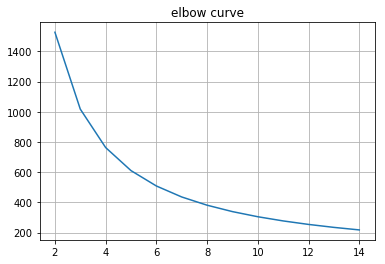

In [22]:
plt.plot(n_cluster, res)
plt.title('elbow curve')
plt.grid(True)
plt.show()

In [101]:
kmeans = KMeans(init="k-means++",n_clusters=6, random_state=0).fit(dfk)

In [102]:
l=[]
for i in range(len( kmeans.labels_)):
    l.append((i,kmeans.labels_[i]))

In [103]:
matrix=pd.read_csv("information1.csv")
matrix=matrix.as_matrix()

In [104]:
km = KMeans(init="k-means++",n_clusters=8, random_state=0).fit(matrix)

In [41]:
res2 = list()
n_cluster = range(2,15)
for n in n_cluster:
    km = KMeans(init="k-means++",n_clusters=n)
    km.fit(matrix)
    res2.append(np.average(np.min(cdist(matrix, km.cluster_centers_, 'euclidean'), axis=1)))

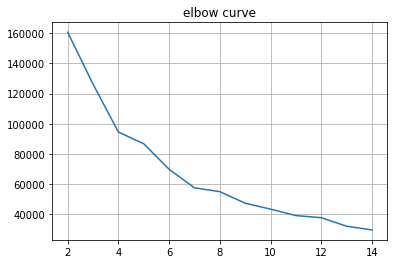

In [43]:
plt.plot(n_cluster, res2)
plt.title('elbow curve')
plt.grid(True)
plt.show()

In [105]:
l1=[]
for i in range(len( km.labels_)):
    l1.append((i,km.labels_[i]))

In [106]:
l=set(l)
l1=set(l1)

### Jaccard similarity


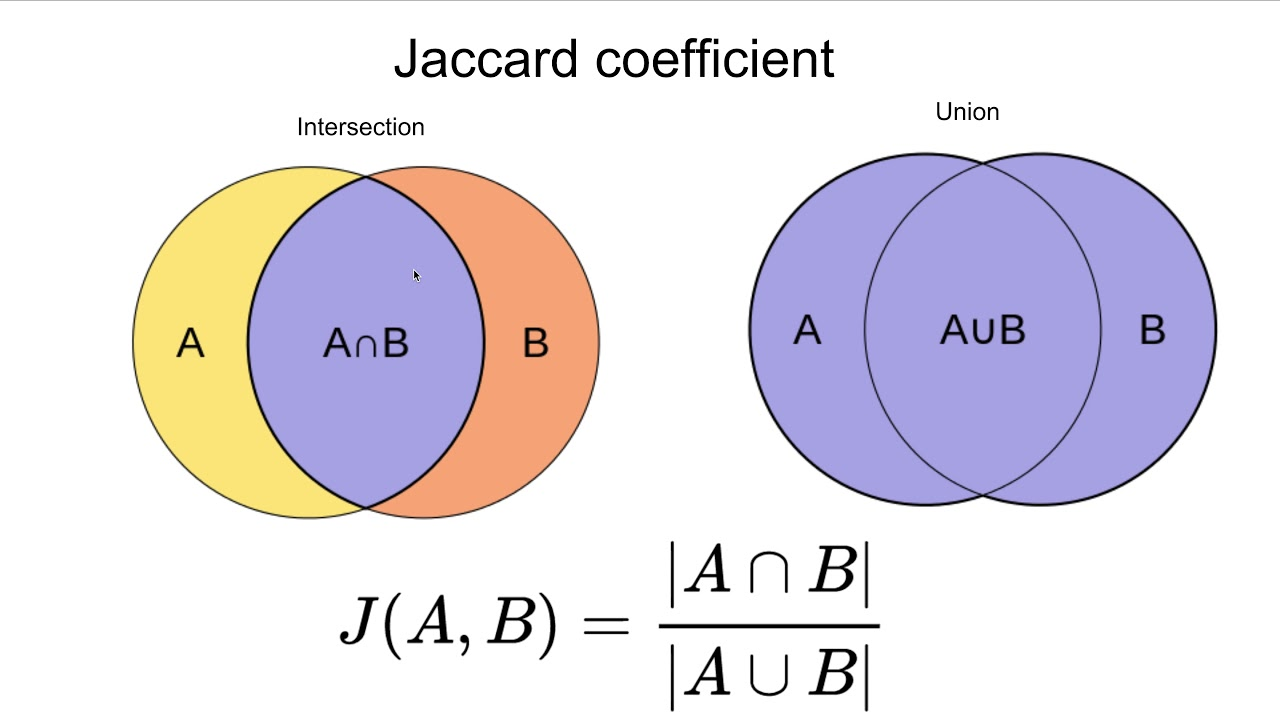

In [29]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("j.jpg",width=300, height=300)

In [107]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [108]:
score=[]
dictS={}
for i in range(6):
    jaccard=[]
    for k in l:
        if k[1]==i:
            jaccard.append(k[0])
    for j in range(8):
        jaccard1=[]
        for k1 in l1:
            if k1[1]==j:
                jaccard1.append(k1[0])
        dictS[(i,j)]=jaccard_similarity(set(jaccard),set(jaccard1))
        #score.append(jaccard_similarity(set(jaccard),set(jaccard1)))

In [109]:
dictS

{(0, 0): 0.12535290796160362,
 (0, 1): 0.06627822286962855,
 (0, 2): 0.010828625235404897,
 (0, 3): 0.11184755592377796,
 (0, 4): 0.002420135527589545,
 (0, 5): 0.10813443740867024,
 (0, 6): 0.03604358759430008,
 (0, 7): 0.0004906771344455348,
 (1, 0): 0.12312312312312312,
 (1, 1): 0.0475,
 (1, 2): 0.008434864104967198,
 (1, 3): 0.06302742616033755,
 (1, 4): 0.0019305019305019305,
 (1, 5): 0.1597894379351333,
 (1, 6): 0.019761218608480857,
 (1, 7): 0.0,
 (2, 0): 0.11627472937663307,
 (2, 1): 0.0449358059914408,
 (2, 2): 0.005615348619560131,
 (2, 3): 0.08192318023099651,
 (2, 4): 0.0019333011116481392,
 (2, 5): 0.1530146934639419,
 (2, 6): 0.02443064182194617,
 (2, 7): 0.0004901960784313725,
 (3, 0): 0.12073490813648294,
 (3, 1): 0.08007380073800738,
 (3, 2): 0.010833725859632595,
 (3, 3): 0.11712461837357757,
 (3, 4): 0.004366812227074236,
 (3, 5): 0.09376502644654593,
 (3, 6): 0.05688622754491018,
 (3, 7): 0.0,
 (4, 0): 0.1364240927227817,
 (4, 1): 0.04980293801504837,
 (4, 2): 0.009

## Word cloud of house descriptions

In [60]:
from os import path
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

In [110]:
dfc=pd.read_csv("wordcloud.csv")
dfc1=pd.read_csv("information1.csv")

In [113]:
wordc=[]
for m in l:
    if m[1]==4:
        wordc.append(m[0])
wordc1=[]
for m1 in l1:
    if m1[1]==5:
        wordc1.append(m1[0])

In [121]:
worddoc=list(set().union(wordc,wordc1))

In [123]:
word=dfc.loc[worddoc]

In [130]:
from textblob import Word
stop = stopwords.words('italian')
stop1 = stopwords.words('english')
stemmer = SnowballStemmer("italian")
#okenizer = RegexpTokenizer(r'\w+')
rem=string.punctuation+'“–”’°‘'
pattern = r"[{}]".format(rem)
dfc['description']=dfc['description'].str.replace(pattern,' ')
dfc['description'] = dfc['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfc['description'] = dfc['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dfc['description']=dfc['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop1))
dfc['description'] = dfc['description'].str.replace('\d+','')
#dfc['description'] = dfc['description'].str.replace('[^\w\s]','')
dfc["description"] = dfc["description"].apply(nltk.word_tokenize)
dfc['description']=dfc['description'].apply(lambda x :" ".join(x))
dfc['description'] = dfc['description'].apply(remove_punctuations)
#dfc.description = dfc.description.apply(str).apply(tokenizer.tokenize)
dfc['description'] = dfc['description'].apply(remove_accents)
dfc['description']=dfc['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [131]:
dfc.to_csv("final-wordcloud.csv",index=False)

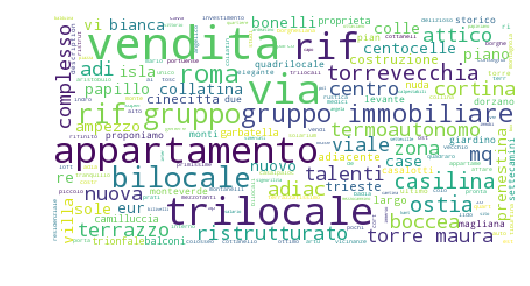

In [135]:
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(dfc.loc[worddoc]))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


In [136]:
wordc=[]
for m in l:
    if m[1]==2:
        wordc.append(m[0])
wordc1=[]
for m1 in l1:
    if m1[1]==4:
        wordc1.append(m1[0])

In [137]:
worddoc=list(set().union(wordc,wordc1))

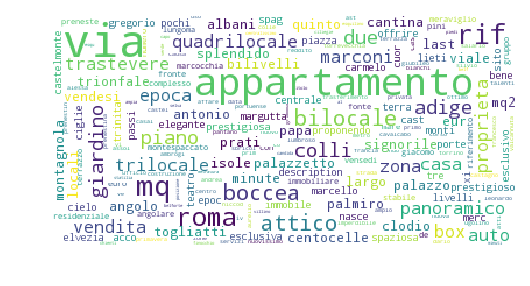

In [138]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(dfc.loc[worddoc]))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [139]:
wordc=[]
for m in l:
    if m[1]==1:
        wordc.append(m[0])
wordc1=[]
for m1 in l1:
    if m1[1]==4:
        wordc1.append(m1[0])

In [140]:
worddoc=list(set().union(wordc,wordc1))

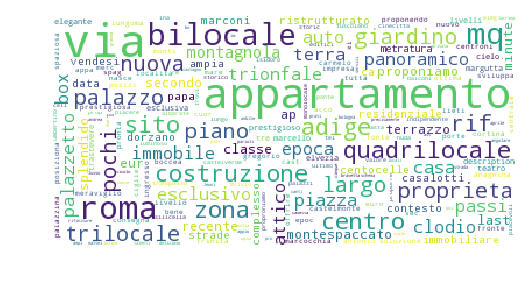

In [141]:
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(dfc.loc[worddoc]))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)